In [75]:
import pandas as pd
import numpy as np

### Data Loading

In [76]:
def load_data(file_path):
    texts, labels = [], []

    with open(file_path, "r") as f:
        for line in f:
            if ";" in line:
                text, label = line.strip().split(';')
                texts.append(text)
                labels.append(label)
        return texts, labels

# test and validation data
X_train1, y_train1 = load_data("./dataset/train.txt")
X_val, y_val = load_data("./dataset/val.txt")

# test data
X_test, y_test = load_data("./dataset/test.txt")

df_train = pd.DataFrame({
    'text': X_train1 + X_val,
    'emotion': y_train1 + y_val
})

df_test = pd.DataFrame({
    'text': X_test,
    'emotion': y_test
})

print(df_train.head())
print(df_train['emotion'].value_counts())

                                                text  emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger
emotion
joy         6066
sadness     5216
anger       2434
fear        2149
love        1482
surprise     653
Name: count, dtype: int64


## Preprocessing
#### lowering case, removing stop words 

In [77]:
import nltk 
from nltk.corpus import stopwords
nltk.download('stopwords')

stopwords = set(stopwords.words('english'))

def preprocess(text):
    text = text.lower().split()
    filtered = [word for word in text if word not in stopwords]
    return " ".join(filtered)

df_train['cleaned_text'] = df_train['text'].apply(preprocess)
df_test['cleaned_text'] = df_test['text'].apply(preprocess)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sunda\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


#### Vectorizing and Label Enconding

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

tfidf = TfidfVectorizer(ngram_range=(1, 2))
X_train = tfidf.fit_transform(df_train['cleaned_text'])
X_test = tfidf.transform(df_test['cleaned_text'])

le = LabelEncoder()
y_train = le.fit_transform(df_train['emotion'])
y_test = le.transform(df_test['emotion'])

print(X_train.shape)
print(y_train[:10])

(18000, 121798)
[4 4 0 3 0 4 5 1 2 3]


## Logistic Regression

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score 

lr = LogisticRegression(class_weight='balanced', max_iter=1000)
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.883
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       275
           1       0.88      0.82      0.85       224
           2       0.94      0.88      0.91       695
           3       0.68      0.89      0.77       159
           4       0.95      0.90      0.93       581
           5       0.58      0.89      0.70        66

    accuracy                           0.88      2000
   macro avg       0.82      0.88      0.84      2000
weighted avg       0.90      0.88      0.89      2000



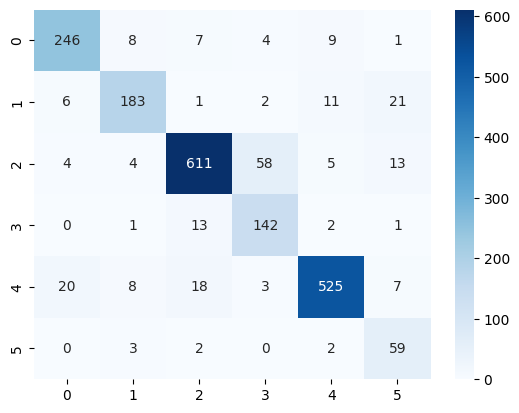

In [80]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.show()

In [81]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train, y_train)

y_pred = nb.predict(X_test)

print("Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy:  0.6705
              precision    recall  f1-score   support

           0       0.92      0.21      0.35       275
           1       0.91      0.23      0.37       224
           2       0.61      0.99      0.76       695
           3       1.00      0.04      0.07       159
           4       0.72      0.92      0.81       581
           5       0.00      0.00      0.00        66

    accuracy                           0.67      2000
   macro avg       0.69      0.40      0.39      2000
weighted avg       0.73      0.67      0.59      2000



c:\Users\sunda\Machine Learning\Projects\emotion-detector\emotion-venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sunda\Machine Learning\Projects\emotion-detector\emotion-venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\sunda\Machine Learning\Projects\emotion-detector\emotion-venv\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter t

In [82]:
import pickle

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(tfidf, f)

with open("model.pkl", "wb") as f:
    pickle.dump(lr, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)